# 4TIN811U Machine Learning & Deep Learning
# TP 6 (noté) - Régression logistique locale

## Régression logistique localement pondérée
Dans ce TP, vous allez combiner les idées de deux points de matière du cours : la **régression logistique**, et la **régression locale**. Le but va être d'obtenir une *version "locale" de la régression logistique*. Nous étudions donc un problème de classification binaire.

Nous vous demanderons au fil du TP d'implémenter vous-mêmes des fonctions permettant de résoudre ce problème (vous pouvez utiliser `numpy`, mais pas `scikit-learn`).
***IMPORTANT :*** **Vous pouvez également partir de code déjà existant et le modifier, auquel cas il faut impérativement mentionner la source du code d'origine (même pour du code issu des corrections des TPs).**

Les fonctions que nous vous demandons d'implémenter et les questions auxquelles on vous demande de répondre sont un "minimum", mais vous pouvez bien sûr définir vos propres fonctions, rajouter des cases dans le notebook, ou rajouter des commentaires si vous le jugez utile. Si vous tombez à court de temps mais que tout ne fonctionne pas encore, n'hésitez pas à décrire où vous en êtes et ce qui, selon vous, pourrait être corrigé avec plus de temps.

Nous allons utiliser un sous-ensemble du dataset sur les pommes déjà utilisé au TP 2 ; celui-ci est fourni dans `tp6.zip` sur Moodle et s'appelle `dataset_tp6_apples.npy`. Comme d'habitude, on a $m$ données $x^{(i)}\in\mathbb{R}^n$ (où $n$ est le nombre de features), et une classification $y^{(i)}\in\{0, 1\}$ pour chacune de ces données. Ici, $m = 75$ et $n = 2$. Les deux features sont la taille et la *sweetness* des pommes ; une valeur $y^{(i)} = 1$ désigne une bonne pomme, et une valeur $y^{(i)} = 0$ désigne une mauvaise pomme. Les données sont déjà normalisées.

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 75 données, trois colonnes : taille, sweetness et qualité
apple_quality = np.load("dataset_tp6_apples.npy")
print(apple_quality.shape)
print(apple_quality.dtype)
print(apple_quality[0:10,:])

size = apple_quality[:,0]
sweetness = apple_quality[:,1]
quality = apple_quality[:,2]

(75, 3)
float64
[[-9.55123820e-02 -3.77058660e+00  0.00000000e+00]
 [ 1.27457587e+00 -5.12298651e-01  1.00000000e+00]
 [ 2.62695300e-03 -2.29095250e+00  0.00000000e+00]
 [ 1.09886229e+00  2.12028298e+00  1.00000000e+00]
 [-1.31845315e+00 -2.02188403e+00  1.00000000e+00]
 [ 2.88490961e+00 -3.05572548e-01  0.00000000e+00]
 [ 1.64132946e+00  1.39824817e+00  0.00000000e+00]
 [ 2.77424257e+00  4.80234344e-01  1.00000000e+00]
 [-5.05869555e-01  1.22833965e+00  1.00000000e+00]
 [ 3.60222986e+00 -6.07623597e-01  1.00000000e+00]]


Voici le graphique en 2D (une dimension par feature) reprenant les différentes données, en utilisant des symboles différents pour les bonnes et les mauvaises pommes.

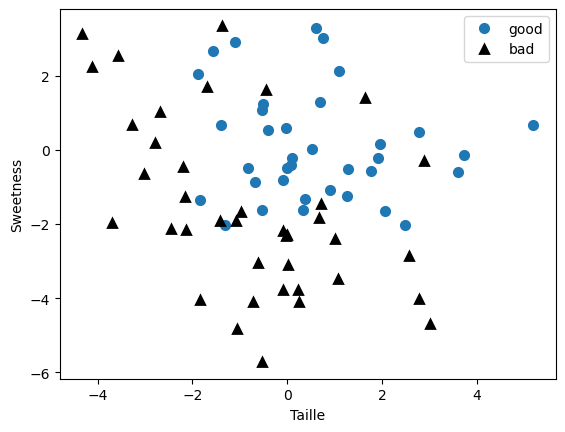

In [3]:
plt.figure()
good_idx = np.where(quality == 1)
bad_idx = np.where(quality == 0)
plt.plot(size[good_idx], sweetness[good_idx], "o", label="good", markeredgewidth=2)
plt.plot(size[bad_idx], sweetness[bad_idx], "^", label="bad", markeredgewidth=2, c="k")
plt.legend()
plt.xlabel("Taille")
plt.ylabel("Sweetness")
plt.show()

Nous allons chercher un vecteur $\theta\in\mathbb{R}^{n+1}$ maximisant la fonction de log-vraisemblance suivante pour un $x\in\mathbb{R}^{n+1}$ fixé ($\tau$ est un paramètre) :
$$\ell(\theta) = \left(\sum_{i = 1}^m w^{(i)} \left[y^{(i)}\log h_\theta(x^{(i)}) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))\right]\right) - \frac{\lambda}{2}\theta^T\theta,$$
où
$$h_\theta(x^{(i)}) = \frac{1}{1 + e^{-\theta^{T}x^{(i)}}}, \text{ et } w^{(i)} = \exp\left(-\frac{||x - x^{(i)}||^2}{2\tau^2}\right).$$
Le terme $-\frac{\lambda}{2}\theta^T\theta$ est un *paramètre de régularisation* utile pour que la méthode fonctionne bien ; considérez-le dans votre implémentation, mais ne vous inquiétez pas de son interprétation dans le TP. Vous pouvez fixer $\lambda = 0.0001$.

Hormis ce terme $-\frac{\lambda}{2}\theta^T\theta$, quel est le changement dans la formule de $\ell$ par rapport à la formule de log-vraisemblance pour la régression logistique classique (celle vue au cours) ? Quel est l'effet de ce changement ?

*Réponse* :Le changement est l'ajout du terme 𝑤(𝑖). Ceci permet de prendre en compte la proximité des donnéespar rapport a x

À nouveau, les poids sont paramétrés par une *bande passante* $\tau$. À l'aide d'un ou plusieurs graphiques (avec un nombre de dimensions adapté à notre problème actuel), discutez d'une valeur raisonnable pour $\tau$.

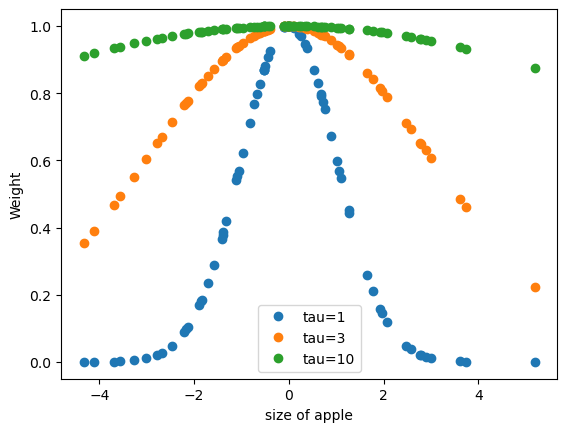

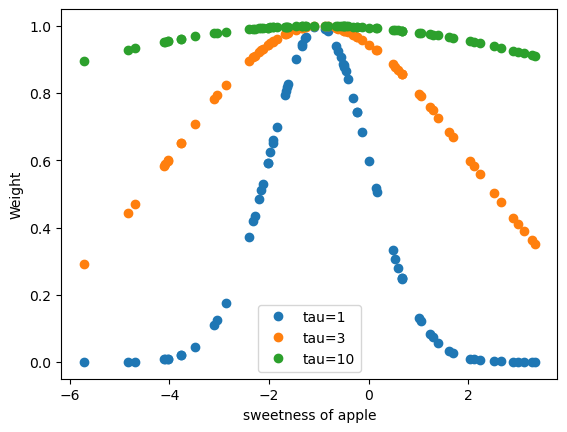

In [92]:
#code de la correction du tp2

def weight(x, xi, tau):
    """Returns the weight to give xi from the training set
       with respect to a point x and with bandwidth tau."""
    diff = np.subtract(xi, x)
    return np.exp(- np.inner(diff, diff) / (2 * (tau ** 2)))

def weight_vector(x, X, tau):
    """Returns the vector of weights for each element of vector X
       with respect to a point x and with bandwidth tau."""
    return np.array([weight(x, xi, tau) for xi in X])


plt.figure()
x = 0
plt.plot(size, weight_vector(x, size, 1), "o", label="tau=1")
plt.plot(size, weight_vector(x, size, 3), "o", label="tau=3")
plt.plot(size, weight_vector(x, size, 10), "o", label="tau=10")
plt.legend()
plt.xlabel("size of apple")
plt.ylabel("Weight")
plt.show()


plt.figure()
x = -1
plt.plot(sweetness, weight_vector(x, sweetness, 1), "o", label="tau=1")
plt.plot(sweetness, weight_vector(x, sweetness, 3), "o", label="tau=3")
plt.plot(sweetness, weight_vector(x, sweetness, 10), "o", label="tau=10")
plt.legend()
plt.xlabel("sweetness of apple")
plt.ylabel("Weight")
plt.show()

*Réponse (quelle(s) valeur(s) de $\tau$ choisiriez-vous, et pourquoi ?)* :

Je choisirais un tau égale à 1.  la courbe représente une loi normale qui n'est pas trop large, mais qui conserve des poids significatifs pour différentes valeurs de x.

Le gradient de $\ell$ est donné par

$$\nabla_\theta \ell(\theta) = X^Tz - \lambda\theta,$$
où $z_i = w^{(i)}(y^{(i)} - h_\theta(x^{(i)}))$.

Pour un $\theta\in\mathbb{R}^{n+1}$, quelle est la taille du vecteur $\nabla_\theta \ell(\theta)$ ?

*Réponse* : La taille du vecteur sera égale à la taille de $\theta\in\mathbb{R}^{n+1}$.

Implémentez une fonction qui retourne le gradient de la fonction $\ell$ évaluée en un point $\theta$ par rapport à un point x.

In [75]:
lamb = 0.0001 # Paramètre lambda

#code correction tp 2
def h(xi, theta):
    return 1 / (1 + np.exp(-theta.T @ xi))


def gradient_l(X, Y, theta, x, tau):
    m, n = X.shape
    Z = np.zeros((m))
    for i in range(0, m):
        w_i = weight(x, X[i], tau)
        Z[i] =  (Y[i] - h(X[i], theta))
        Z[i] =  w_i * Z[i]
    gradient = X.T @ Z -lamb * theta
    return gradient
        

In [76]:
#test 

X = apple_quality[:, 0:2]
m, n = X.shape
X = np.concatenate((np.ones((m, 1)), X), axis=1)
Y = apple_quality[:, 2]
theta= np.zeros((n+1))
x=0
tau=1

print (gradient_l(X, Y, theta, x, tau))

[ 2.94665438  0.35664253 -0.22625549]


La matrice hessienne de $\ell$ est donnée par
$$ H_{\ell}(\theta) = X^TDX - \lambda I,$$
où $I$ est la matrice identité, et $D$ est la matrice diagonale telle que
$$
    D_{ii} = -w^{(i)}h_\theta(x^{(i)})(1 - h_\theta(x^{(i)})).
$$

Quelles sont les dimensions de la matrice $D$ et de la matrice hessienne $H_\ell$ ?

*Réponse* :

Comme D est une matrice diagonale, elle a pour dimension (m,m)
Comme $H_\ell$ est une matrice identité, elle a pour dimension (n,n)

Implémentez une fonction qui retourne la matrice hessienne de $\ell$ évaluée en un $\theta$.

In [77]:
def hessian_l(X, theta, x, tau):
    m, n = X.shape
    
    D = -np.diag([weight(x, X[i], tau) * h(X[i], theta) * (1 - h(X[i],theta)) for i in range(m)])

    H_l = X.T@D@X - lamb * np.identity(n)
    return H_l

In [78]:
#test 

X = apple_quality[:, 0:2]
m, n = X.shape
X = np.concatenate((np.ones((m, 1)), X), axis=1)
Y = apple_quality[:, 2]
theta= np.zeros((n+1))
x=0
tau=1

print (hessian_l(X, theta, x, tau))

[[-1.95825122 -0.03837237  0.51628084]
 [-0.03837237 -1.25673327  0.14820515]
 [ 0.51628084  0.14820515 -1.91693304]]


Donnez une implémentation de la méthode de Newton qui permettra (dans les cases suivantes du notebook) de trouver un maximum de la fonction $\ell$.

In [95]:
def theta_minimizing_error(X, Y, x, tau, weight_function=weight_vector):
    m, _ = X.shape

    # Construction de la matrice W
    weights = weight_function(x, X, tau)
    W = np.zeros((m, m))
    for i in range(m):
        W[i][i] = .5 * weights[i]
    
    # Précalcul pour éviter une multiplication matricielle redondante
    XTW = X.T @ W

    # Formule exacte vue au cours
    return np.linalg.inv(XTW @ X) @ XTW @ Y

def prediction(X, Y, x, tau, weight_function=weight_vector):
    one_x = np.concatenate(([1], np.atleast_1d(x)))
    theta = theta_minimizing_error(X, Y, one_x, tau, weight_function=weight_function)
    return one_x.T @ theta


def newton_multidim(f, df, theta_0, max_iter=1000, epsilon=1e-6):
    """Finds a root of multivariate function f given its gradient df and an initial guess theta_0.
       Assumes that a value theta is a root if np.linalg.norm(f(theta)) < epsilon.
       Raises an exception if no such value is found within max_iter iterations."""
    f_theta_0 = f(theta_0)
    i = 0
    while np.linalg.norm(f_theta_0) > epsilon and i < max_iter:
        theta_0 = theta_0 - np.linalg.inv(df(theta_0)) @ f_theta_0
        f_theta_0 = f(theta_0)
        i += 1
    if np.linalg.norm(f_theta_0) > epsilon and i >= max_iter:
        raise Exception("No root of f found in newton_multidim within the given number of iterations.")
    return theta_0

    
def weight_vector(x, X, tau):
    """Returns the vector of weights for each element of vector X
       with respect to a point x and with bandwidth tau."""
    return np.array([weight(x, xi, tau) for xi in X])

def weight(x, xi, tau):
    """Returns the weight to give xi from the training set
       with respect to a point x and with bandwidth tau."""
    diff = np.subtract(xi[:-1], x[:-1])  # Ignore the last element as it's assumed to be the bias term
    return np.exp(-np.inner(diff, diff) / (2 * (tau ** 2)))

# Reste du code inchangé


Veuillez classifier et afficher sur un graphique les résultats de votre implémentation pour de nombreux points de l'espace. Pour cette méthode, suffit-il de trouver un seul vecteur $(\theta_0, \theta_1, \theta_2)$ maximisant la log-vraisemblance et de tracer la frontière qui sépare les points classés $0$ et les points classés $1$ ? Pourquoi ?

*Réponse* :

*Conseils pour l'affichage* : utilisez des couleurs différentes pour les prédictions et les données, et utilisez le paramètre `alpha` de la fonction `plt.plot` pour régler la transparence des prédictions (`alpha=.4` semble être une bonne valeur sur nos ordinateurs).

In [98]:
X = apple_quality[:, 0:2]
m, n = X.shape
X = np.concatenate((np.ones((m, 1)), X), axis=1)
Y = apple_quality[:, 2]
x=0
tau=10

gradient_l_theta = lambda theta: gradient_l(X, Y, theta, x, tau)
to_evaluate = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 300)
predictions = [prediction(X, Y, x, tau) for x in to_evaluate]

theta_max = newton_multidim(gradient_l_theta, H_theta, predictions)
print(theta_max)


plt.figure()
good_idx = np.where(quality == 1)
bad_idx = np.where(quality == 0)
plt.plot(size[good_idx], sweetness[good_idx], "o", label="good")
plt.plot(size[bad_idx], sweetness[bad_idx], "^", label="bad")
plt.legend()
plt.xlabel("Size")
plt.ylabel("Sweetness")

to_evaluate = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
plt.plot(to_evaluate, [(-theta_max[0] - theta_max[1] * x) / theta_max[2] for x in to_evaluate], "-")
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

*Ne répondez à la question suivante que si vos résultats jusqu'ici sont cohérents.*

Faites varier le paramètre $\tau$. Sur base de vos graphiques, comment interprétez-vous la variation du paramètre $\tau$ (par exemple, entre $0.1$ et $10$) ?

*Réponse* :